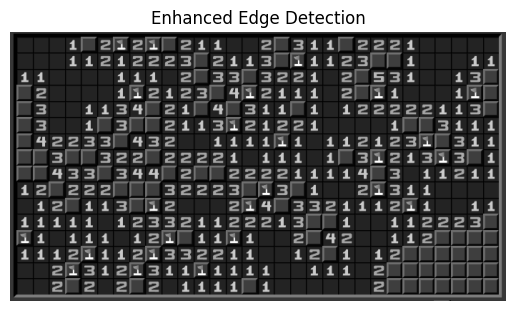

C:\Users\13368\AppData\Local\Temp\ipykernel_13856\627110019.py:37: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)  # 转换为整数


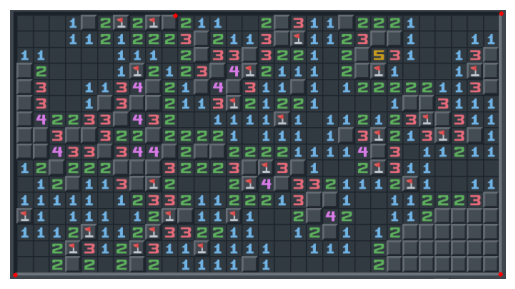

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image_path = "222.png"
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Image at path '{image_path}' not found or cannot be loaded.")

# 获取图像的尺寸
height, width = image.shape[:2]

# 创建一个空白的遮罩，大小与图像相同
mask = np.ones((height, width), dtype=np.uint8)

# 忽略距离边缘20个像素的区域
mask[10:height-10, 10:width-10] = 0

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 显示处理后的边缘图像
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.title("Enhanced Edge Detection")
plt.show()

# 预处理：高斯模糊
blurred = cv2.GaussianBlur(gray, (5, 5), 1)

# 使用 goodFeaturesToTrack 来检测角点，设置参数
corners = cv2.goodFeaturesToTrack(blurred, maxCorners=4, qualityLevel=0.1, minDistance=300, mask=mask)

# 如果角点存在，进行标记
if corners is not None:
    corners = np.int0(corners)  # 转换为整数
    for corner in corners:
        x, y = corner.ravel()  # 获取角点的 (x, y) 坐标
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)  # 用红色圆圈标记角点

# 显示结果
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Top-left: (664, 366)
Top-right: (682, 346)
Bottom-left: (574, 366)
Bottom-right: (619, 366)
Cropped area: x_min=574, x_max=682, y_min=346, y_max=366


C:\Users\13368\AppData\Local\Temp\ipykernel_13856\456873944.py:41: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)  # 转换为整数


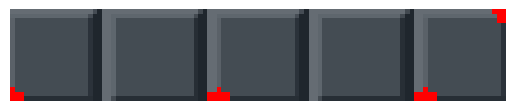

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image_path = "222.png"
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Image at path '{image_path}' not found or cannot be loaded.")

# 获取图像的尺寸
height, width = image.shape[:2]

# 创建一个空白的遮罩，大小与图像相同
mask = np.ones((height, width), dtype=np.uint8)

# 忽略距离边缘20个像素的区域
mask[15:height-15, 15:width-15] = 0

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 预处理：高斯模糊
blurred = cv2.GaussianBlur(gray, (9, 9), 0)

# 使用 Canny 边缘检测（调整阈值）
low_threshold = 20
high_threshold = 40
edges = cv2.Canny(blurred, low_threshold, high_threshold)

# 可选：使用形态学操作增强边缘
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1)

# 使用 goodFeaturesToTrack 来检测角点，设置参数
corners = cv2.goodFeaturesToTrack(edges, maxCorners=4, qualityLevel=0.01, minDistance=10, mask=-mask)

# 如果角点存在，进行标记
if corners is not None:
    corners = np.int0(corners)  # 转换为整数
    for corner in corners:
        x, y = corner.ravel()  # 获取角点的 (x, y) 坐标
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)  # 用红色圆圈标记角点

    # 获取四个角点的坐标
    corners = sorted(corners, key=lambda x: x[0][1])  # 按照y坐标进行排序（从上到下）
    top_left, top_right = sorted(corners[:2], key=lambda x: x[0][0])  # 最上面两个点，按x排序
    bottom_left, bottom_right = sorted(corners[2:], key=lambda x: x[0][0])  # 最下面两个点，按x排序

    # 提取角点坐标
    top_left = tuple(top_left[0])
    top_right = tuple(top_right[0])
    bottom_left = tuple(bottom_left[0])
    bottom_right = tuple(bottom_right[0])

    # 打印角点坐标，查看结果
    print(f"Top-left: {top_left}")
    print(f"Top-right: {top_right}")
    print(f"Bottom-left: {bottom_left}")
    print(f"Bottom-right: {bottom_right}")

    # 获取裁剪区域的矩形范围（最小的矩形框）
    x_min = min(top_left[0], bottom_left[0])
    x_max = max(top_right[0], bottom_right[0])
    y_min = min(top_left[1], top_right[1])
    y_max = max(bottom_left[1], bottom_right[1])

    # 调试输出裁剪区域的坐标
    print(f"Cropped area: x_min={x_min}, x_max={x_max}, y_min={y_min}, y_max={y_max}")

    # 检查裁剪区域是否有效
    if x_min < 0 or x_max > width or y_min < 0 or y_max > height:
        raise ValueError("Calculated crop area is out of image bounds.")

    # 裁剪图像
    cropped_image = image[y_min:y_max, x_min:x_max]

    if cropped_image.size == 0:
        raise ValueError("Cropped image is empty. Check the calculated coordinates.")

    # 显示裁剪后的图像
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

else:
    raise ValueError("No corners were detected.")


Corner 1: (x=6, y=5)
Corner 2: (x=688, y=5)
Corner 3: (x=688, y=372)
Corner 4: (x=6, y=372)


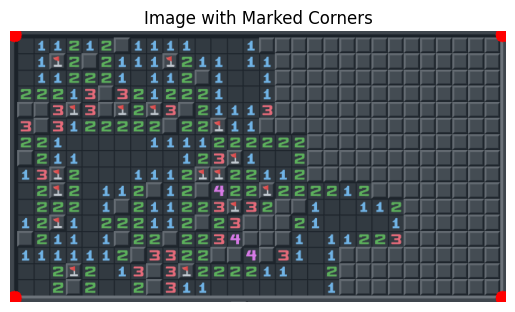

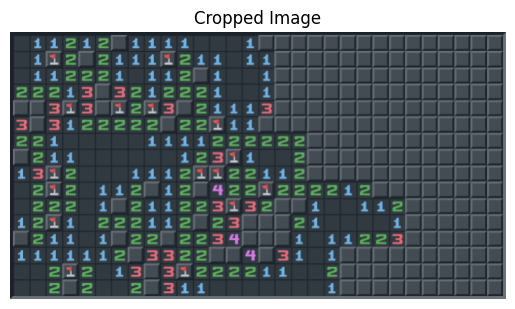

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并检查
image_path = "333.png"
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Image at path '{image_path}' not found or cannot be loaded.")

# 复制图像用于显示红点标记
image_with_dots = image.copy()

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 高斯模糊以减少噪声
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 使用 Canny 边缘检测
low_threshold = 20
high_threshold = 100
edges = cv2.Canny(blurred, low_threshold, high_threshold)

# 形态学操作增强边缘
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1)

# 找到轮廓
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 初始化顶点坐标
corners = []

# 遍历轮廓，寻找具有四个顶点的轮廓
for contour in contours:
    # 使用多边形逼近轮廓
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # 检查是否为四边形
    if len(approx) == 4:
        corners = approx
        break

# 如果找到四个角点，输出坐标
if len(corners) == 4:
    # 将角点排序为左上、右上、右下和左下
    corners = sorted(corners, key=lambda x: (x[0][1], x[0][0]))
    top_points = sorted(corners[:2], key=lambda x: x[0][0])   # 左上、右上
    bottom_points = sorted(corners[2:], key=lambda x: x[0][0]) # 左下、右下
    sorted_corners = np.array([top_points[0], top_points[1], bottom_points[1], bottom_points[0]])
    
    # 输出角点坐标，并在 image_with_dots 上标注红点
    for i, point in enumerate(sorted_corners):
        x, y = point[0]
        print(f"Corner {i + 1}: (x={x}, y={y})")
        cv2.circle(image_with_dots, (x, y), 10, (0, 0, 255), -1)  # 使用红色标注

    # 定义裁剪后的图像尺寸
    width = int(np.linalg.norm(sorted_corners[0][0] - sorted_corners[1][0]))
    height = int(np.linalg.norm(sorted_corners[0][0] - sorted_corners[3][0]))

    # 定义目标点，顺序与 sorted_corners 对应
    dst_points = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype="float32")

    # 计算透视变换矩阵
    M = cv2.getPerspectiveTransform(sorted_corners.astype("float32"), dst_points)

    # 进行透视变换以裁剪图像
    cropped_image = cv2.warpPerspective(image, M, (width, height))

    # 保存裁剪后的图像，不包含红点
    cv2.imwrite("temmap.png", cropped_image)

    # 显示带红点的图像
    plt.imshow(cv2.cvtColor(image_with_dots, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Image with Marked Corners")
    plt.show()

    # 显示裁剪后的图像
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Cropped Image")
    plt.show()
else:
    print("未检测到四个角点，无法裁剪。")
